https://crumplab.github.io/psyc7709/book/docs/a-tutorial-for-using-the-lme-function-from-the-nlme-package-.html

In [1]:
install.packages("nlme")


The downloaded binary packages are in
	/var/folders/tw/j1fhz1vs0hvbqkyjb47bdgc80000gn/T//RtmpzXqVdg/downloaded_packages


In [2]:
library(ggplot2)
library(nlme)
library(dplyr)
library(knitr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
#creating a data set 
# An example: Does the number of daily naps impact infant performance on a test?

# '''
# 3.3.1 The experimental design.
# This is a 4x3 within subject design. 
# Infants are assessed at 4 time points - 1 month, 5 months, 10 months, and 15 months. 
# There are 3 levels of napping - 1, 2, or 3 naps per day.
# '''

Subs <- rep(c(seq(1:10)), 4)

Month <- c(rep(c(1), 10), rep(c(5), 10), rep(c(10), 10), rep(c(15), 10))

Naps <- c(rep(c(3), 10), 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 2 ,2, 3, 3, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 2, 1 )

Napsfactor <- as.factor(Naps)
Subsfactor <- as.factor(Subs)

#Let's assume that infants' performance will get better with time. I altered the possible sampling distributions to reflect this. 

scores <- c(runif(10, 1, 7), runif(10, 8, 15), runif(10, 16, 22), runif(10, 23, 30))


dataset <- data.frame(Subs, Month, Naps, scores, Napsfactor)

#save(dataset,file="horger.RData")

In [4]:
print(dataset)

   Subs Month Naps    scores Napsfactor
1     1     1    3  4.173888          3
2     2     1    3  5.257335          3
3     3     1    3  2.386197          3
4     4     1    3  4.210084          3
5     5     1    3  3.078698          3
6     6     1    3  5.713919          3
7     7     1    3  2.575832          3
8     8     1    3  2.734417          3
9     9     1    3  4.197787          3
10   10     1    3  5.784367          3
11    1     5    2  8.030438          2
12    2     5    3 13.758857          3
13    3     5    2 12.776717          2
14    4     5    1  8.716753          1
15    5     5    2 14.143234          2
16    6     5    3 10.525249          3
17    7     5    2 10.375823          2
18    8     5    3 12.255718          3
19    9     5    2 10.380916          2
20   10     5    3 14.281885          3
21    1    10    2 18.146978          2
22    2    10    2 18.214211          2
23    3    10    2 19.052106          2
24    4    10    2 18.943467          2


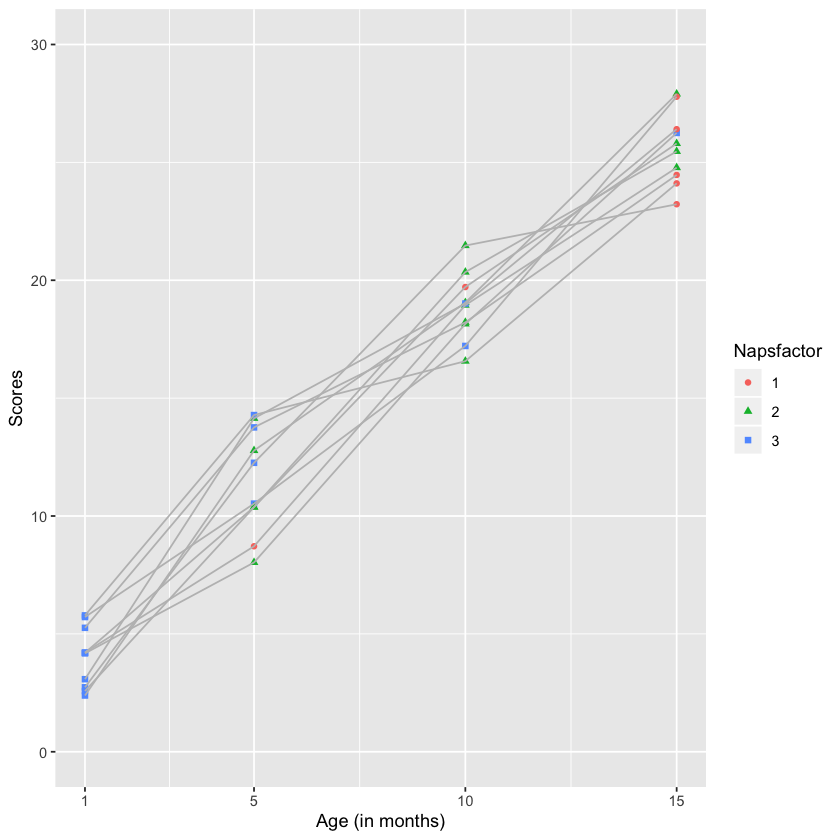

In [6]:
plot1<- ggplot(dataset, aes(x=Month, y=scores,  color=Napsfactor, shape = Napsfactor, group = Subs), 
               xlim(1, 15), ylim(0, 25), xlab(Month) ) + 
              geom_point() +
              geom_line(color="grey")

plot1 + scale_x_continuous(name="Age (in months)", limits=c(1, 15), breaks =c(1,5,10,15)) +
  scale_y_continuous(name="Scores", limits=c(0, 30))

In [12]:
tutorial <- lm(scores ~ Month + Subsfactor, data=dataset)
summary(tutorial)


Call:
lm(formula = scores ~ Month + Subsfactor, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7026 -1.1844 -0.2763  1.4307  3.4123 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.78796    1.04781   1.706   0.0986 .  
Month         1.63720    0.05708  28.681   <2e-16 ***
Subsfactor2   0.86955    1.34327   0.647   0.5225    
Subsfactor3   0.49609    1.34327   0.369   0.7146    
Subsfactor4   0.62976    1.34327   0.469   0.6427    
Subsfactor5   0.07139    1.34327   0.053   0.9580    
Subsfactor6  -0.40950    1.34327  -0.305   0.7627    
Subsfactor7   0.38786    1.34327   0.289   0.7748    
Subsfactor8   1.22288    1.34327   0.910   0.3701    
Subsfactor9  -0.65931    1.34327  -0.491   0.6272    
Subsfactor10  1.31324    1.34327   0.978   0.3363    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 29 degrees of freedom
Multiple R-squared:  0.9661,	Adjusted R-squared:  0.9544

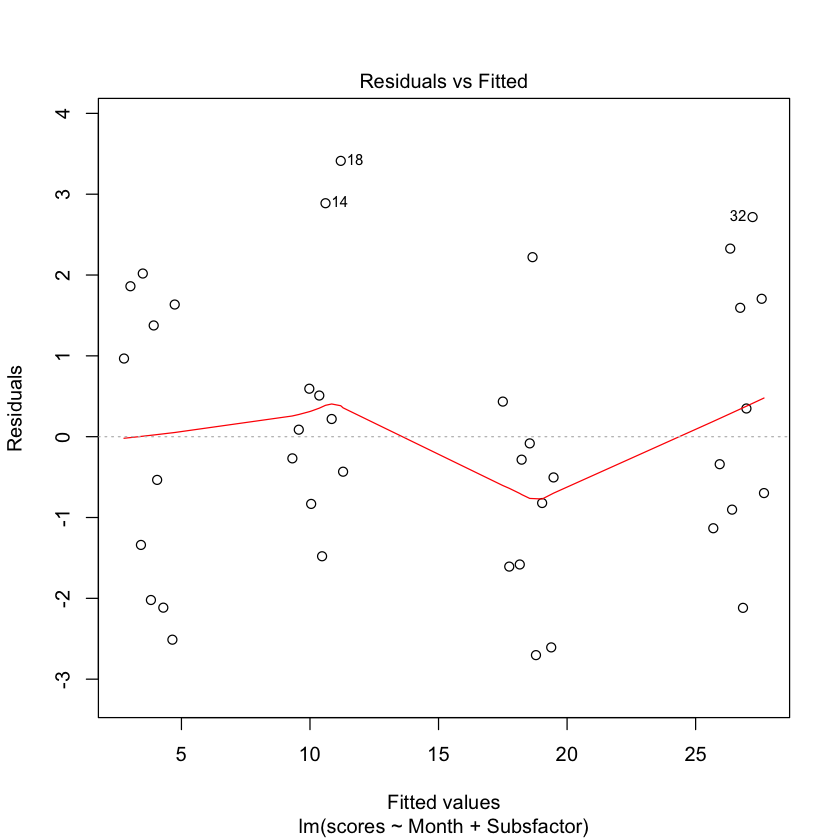

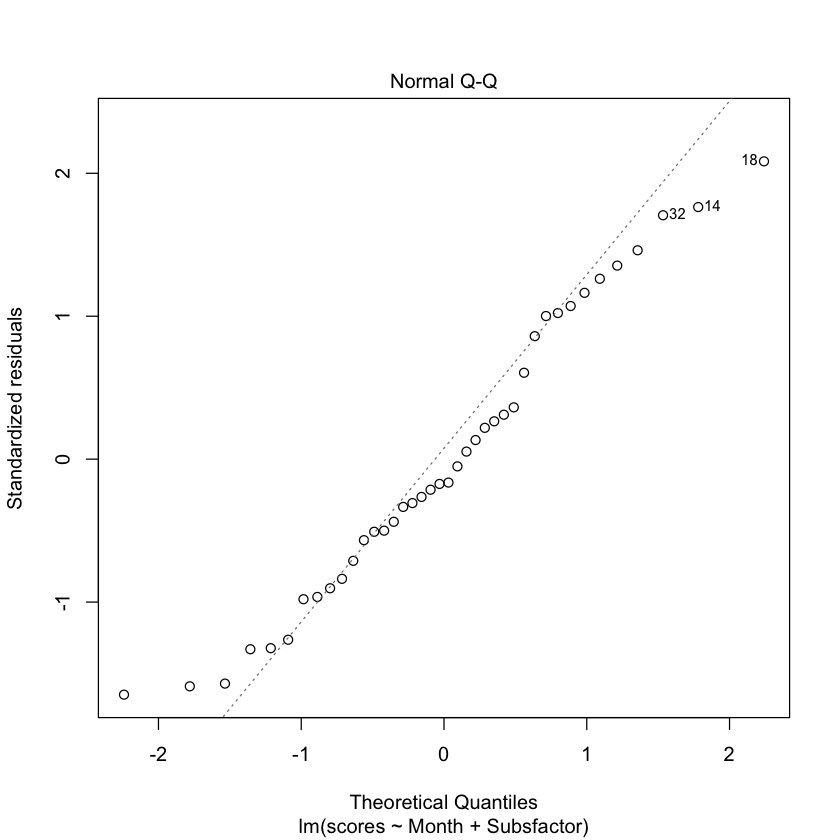

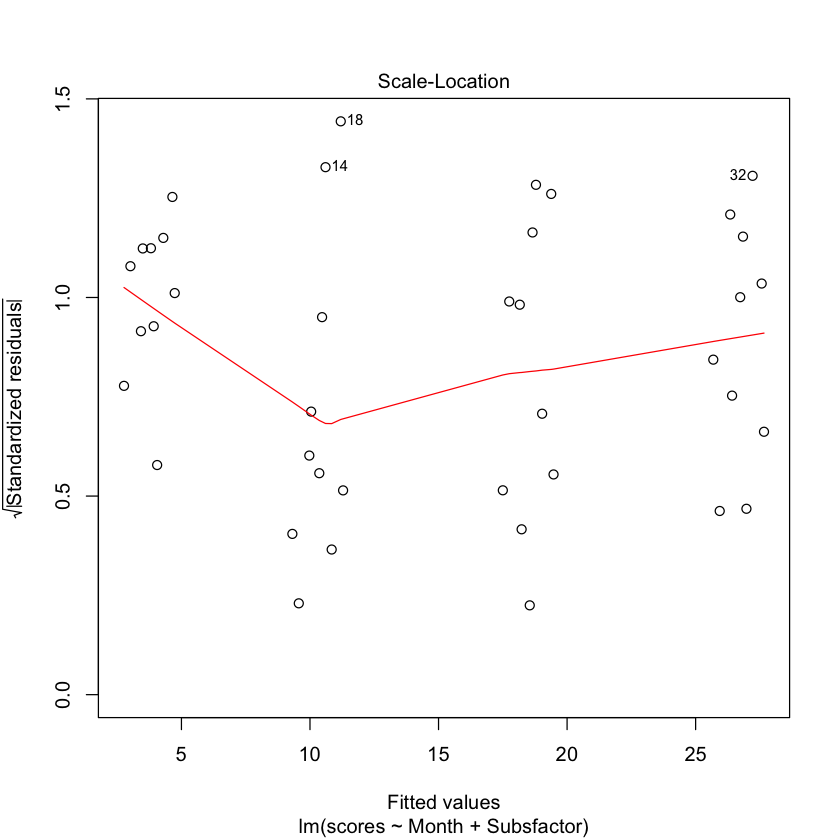

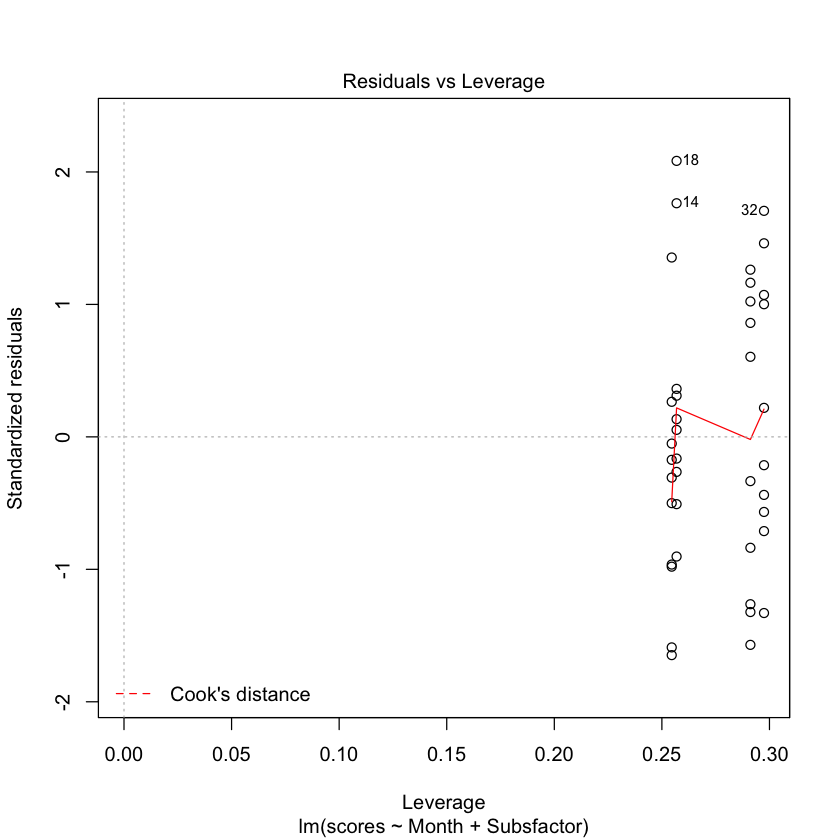

In [13]:
plot(tutorial)

In [17]:
# Examples of sample data in nlme

# BodyWeight
# A data set (176x4) describing the weight of rats over time while consuming different diets.
d <- data(package = "nlme")
d

In [18]:
print(BodyWeight[1:5,])

Grouped Data: weight ~ Time | Rat
  weight Time Rat Diet
1    240    1   1    1
2    250    8   1    1
3    255   15   1    1
4    260   22   1    1
5    262   29   1    1


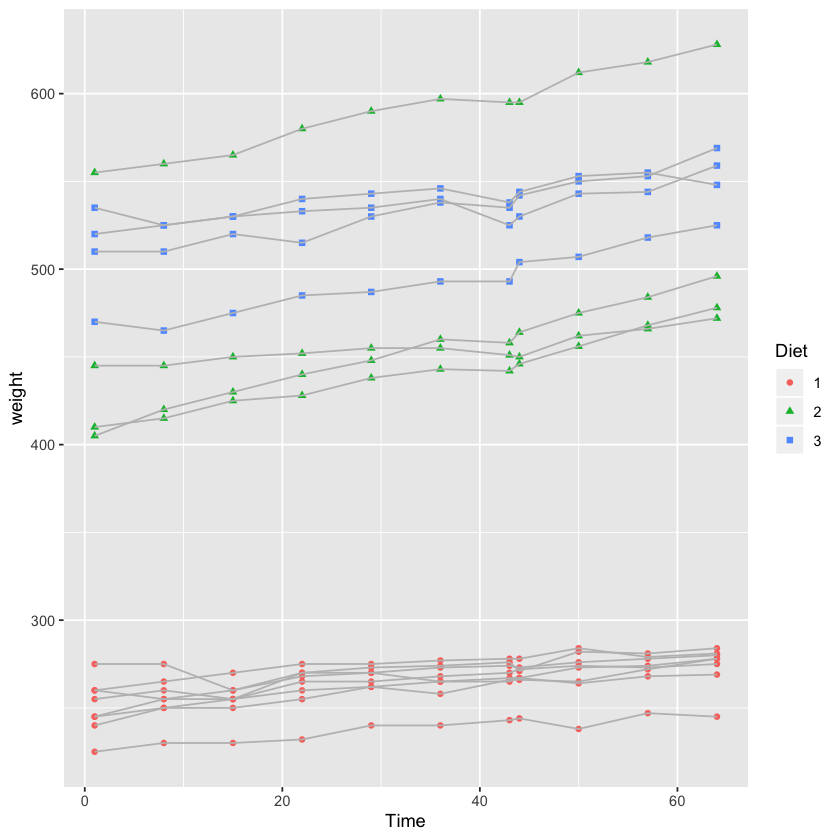

In [21]:
plot2<- ggplot(BodyWeight, aes(x=Time, y=weight,  color=Diet, shape = Diet, group = Rat), 
             xlab(Month) ) + 
              geom_point() +
              geom_line(color="grey")
plot2

In [26]:
summary(BodyWeight)

     weight           Time            Rat      Diet  
 Min.   :225.0   Min.   : 1.00   2      : 11   1:88  
 1st Qu.:267.0   1st Qu.:15.00   3      : 11   2:44  
 Median :344.5   Median :36.00   4      : 11   3:44  
 Mean   :384.5   Mean   :33.55   1      : 11         
 3rd Qu.:511.2   3rd Qu.:50.00   8      : 11         
 Max.   :628.0   Max.   :64.00   5      : 11         
                                 (Other):110         

In [23]:
str(BodyWeight)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	176 obs. of  4 variables:
 $ weight: num  240 250 255 260 262 258 266 266 265 272 ...
 $ Time  : num  1 8 15 22 29 36 43 44 50 57 ...
 $ Rat   : Ord.factor w/ 16 levels "2"<"3"<"4"<"1"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Diet  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Rat
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(g)"
 - attr(*, "FUN")=function (x)  
  ..- attr(*, "source")= chr "function(x) max(x, na.rm = TRUE)"
 - attr(*, "order.groups")= logi TRUE


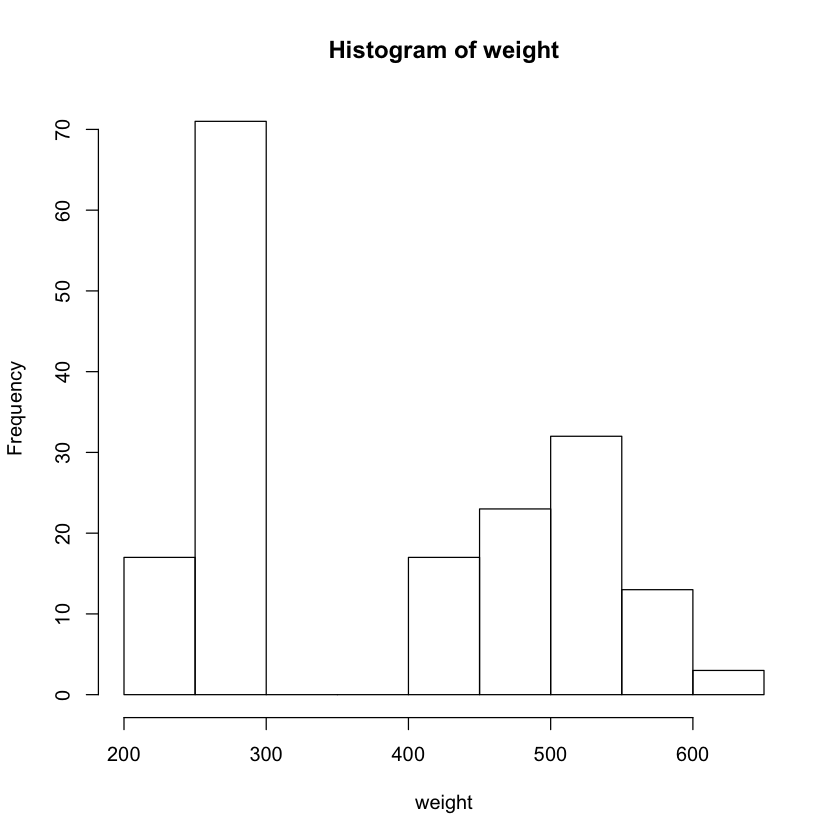

In [24]:
hist(weight)

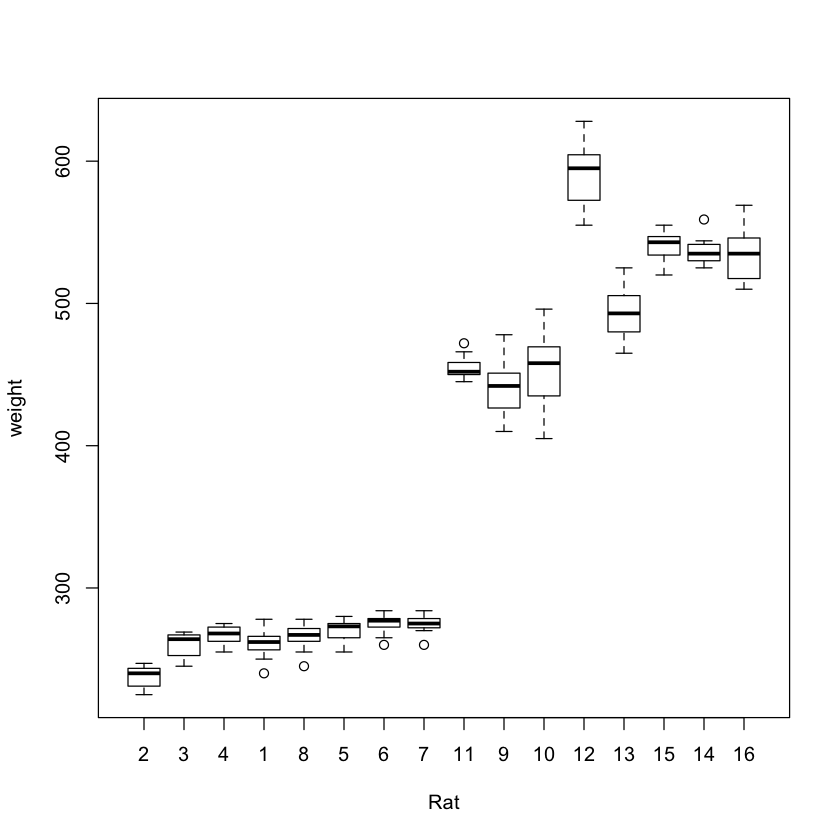

In [25]:
boxplot(weight ~ Rat, data = BodyWeight)

In [28]:
BodyWeight$Time.f <- with(BodyWeight, Time.f <- factor(Time))
summary(BodyWeight)

     weight           Time            Rat      Diet       Time.f  
 Min.   :225.0   Min.   : 1.00   2      : 11   1:88   1      :16  
 1st Qu.:267.0   1st Qu.:15.00   3      : 11   2:44   8      :16  
 Median :344.5   Median :36.00   4      : 11   3:44   15     :16  
 Mean   :384.5   Mean   :33.55   1      : 11          22     :16  
 3rd Qu.:511.2   3rd Qu.:50.00   8      : 11          29     :16  
 Max.   :628.0   Max.   :64.00   5      : 11          36     :16  
                                 (Other):110          (Other):80  

In [ ]:
#Let's add timepoint specific variances

lm1.form <- formula(BodyWeight ~ -1 + Diet)